In [7]:
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

iris = pd.read_csv('../final_csv/reduced_iris.csv')
raisin = pd.read_csv('../final_csv/reduced_raisin.csv')

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

num_columns = iris.shape[1]
print("Number of columns:", num_columns)
iris = iris[['Species', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
iris['Species'] = iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

iris_columns = iris.columns
raisin_columns = raisin.columns

accuracy_overall = []

data = iris

Number of columns: 5


### Fit model with no changes to iris dataset

In [9]:
X = data.drop('Species', axis=1)
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
accuracy_overall.append(accuracy)
cross_val_scores = cross_val_score(knn_classifier, X, y, cv=4)
cross_val_scores = [round(score, 2) for score in cross_val_scores]

print("Accuracy:", accuracy)
print("Cross-Validation Scores:", cross_val_scores)

Accuracy: 0.95
Cross-Validation Scores: [0.97, 0.95, 0.95, 1.0]


### Change columns from iris dataset to raisin


Raisin Column: class  --  Species 


Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]
Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]
Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]
Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]
Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]
Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]
Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]
Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]
Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]
Cross-Validation Scores: [0.63, 0.92, 0.81, 0.54]

Raisin Column: majoraxislength  --  SepalLengthCm 


Cross-Validation Scores: [0.87, 0.87, 0.86, 0.89]
Cross-Validation Scores: [0.87, 0.87, 0.86, 0.89]
Cross-Validation Scores: [0.87, 0.87, 0.86, 0.89]
Cross-Validation Scores: [0.87, 0.87, 0.86, 0.89]
Cross-Validation Scores: [0.87, 0.87, 0.86, 0.89]
Cross-Validation Scores: [0.87, 0.87, 0.86, 0.89]
Cross-Validation Scores: [0.87, 0.87, 0.86, 0.89]
Cross-Validation Scores: [0.87, 0.87, 0.86, 0.89]
Cross-Va

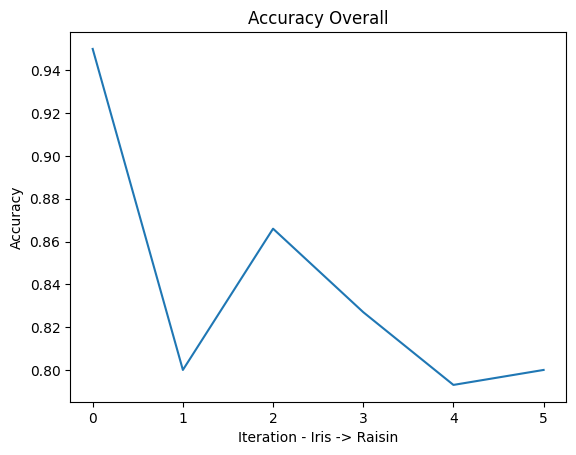

In [10]:
for index in range(num_columns):
    print("\nRaisin Column:", raisin_columns[index], " -- ", iris_columns[index], "\n\n")
    data.iloc[:,index] = raisin.iloc[:,index]

    X = data.drop('Species', axis=1)
    Y = data['Species'].astype('int')

    n_splits = 10

    skf = StratifiedKFold(n_splits, shuffle=True, random_state=10)
    average_accuracy=0
    for fold, (train_index, test_index) in enumerate(skf.split(X, Y)):
        X_train = X.take(train_index)
        y_train = Y.take(train_index)
        X_test = X.take(test_index)
        y_test = Y.take(test_index)

        knn_classifier = KNeighborsClassifier()
        knn_classifier.fit(X_train, y_train)

        y_pred = knn_classifier.predict(X_test)

        accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
        average_accuracy = average_accuracy + accuracy
        cross_val_scores = cross_val_score(knn_classifier, X, Y, cv=4)
        cross_val_scores = [round(score, 2) for score in cross_val_scores]

        print("Cross-Validation Scores:", cross_val_scores)

    average_accuracy = average_accuracy/n_splits
    accuracy_overall.append(average_accuracy)

plt.plot(accuracy_overall)
plt.xlabel('Iteration - Iris -> Raisin')
plt.ylabel('Accuracy')
plt.title('Accuracy Overall')
plt.show()